# TensorFlow Models

In [1]:
import os
import datetime

import IPython
import IPython.display
import matplotlib as mpl
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import tensorflow as tf
import keras

os.chdir(r'C:\Users\Imper\OneDrive\Documents\Raul Castillo\College\Year - 2\SMART Program\ComparingModels\HelperFunctions')
import auxiliaries as aux
os.chdir(r'C:\Users\Imper\OneDrive\Documents\Raul Castillo\College\Year - 2\SMART Program\ComparingModels')

In [2]:
tf.__version__

'2.16.2'

## Setup

In [3]:
# Develop Testing and Applied Window
species = 'Moose'
file_name = 'yl1_interpolated'

tf_tut_window = aux.WindowGenerator(input_width=aux.OUT_STEPS,
                               label_width=aux.OUT_STEPS,
                               shift=aux.OUT_STEPS,
                               cv_name=f'{species}/{file_name}')

reg_window = aux.RegressiveWindow(f'{species}/{file_name}')
classification_window = aux.ClassificationWindow(r'Moose/yl1', 3)

results = {}

print(f'{species}:')
print('------Tensorflow Tutorial Window------')
print(f'Original Data Size: {len(tf_tut_window.orig_df)}')
print(f'Training Data Size: {len(tf_tut_window.train_df)}')
print(f'Validation Data Size: {len(tf_tut_window.val_df)}')
print(f'Testing Data Size: {len(tf_tut_window.test_df)}')

print()

print('------Regressive Model Window------')
print(f'Original Data Size: {len(reg_window.orig_df)}')
print(f'Training Data Size: {int(len(reg_window.train_df)*(7/9))}')
print(f'Validation Data Size: {int(len(reg_window.train_df)*(2/9))}')
print(f'Testing Data Size: {len(reg_window.test_df)}')

Moose:
------Tensorflow Tutorial Window------
Original Data Size: 7744
Training Data Size: 5420
Validation Data Size: 1549
Testing Data Size: 775

------Regressive Model Window------
Original Data Size: 7744
Training Data Size: 5421
Validation Data Size: 1548
Testing Data Size: 774


## Autoregressive Model

- Good start
- Very inaccurate

In [4]:
autoregressive_model = aux.FeedBack(units=32, out_steps=aux.OUT_STEPS, num_vars=3)

In [5]:
history = aux.compile_and_fit(autoregressive_model, tf_tut_window)

Epoch 1/20
164/164 ━━━━━━━━━━━━━━━━━━━━ 30s 47ms/step - loss: 0.7400 - mean_absolute_error: 0.6533 - mean_squared_error: 0.7400 - val_loss: 0.6246 - val_mean_absolute_error: 0.5816 - val_mean_squared_error: 0.6246
Epoch 2/20
164/164 ━━━━━━━━━━━━━━━━━━━━ 5s 31ms/step - loss: 0.5734 - mean_absolute_error: 0.5529 - mean_squared_error: 0.5734 - val_loss: 0.5479 - val_mean_absolute_error: 0.5399 - val_mean_squared_error: 0.5479
Epoch 3/20
164/164 ━━━━━━━━━━━━━━━━━━━━ 5s 32ms/step - loss: 0.5237 - mean_absolute_error: 0.5150 - mean_squared_error: 0.5237 - val_loss: 0.5550 - val_mean_absolute_error: 0.5661 - val_mean_squared_error: 0.5550
Epoch 4/20
164/164 ━━━━━━━━━━━━━━━━━━━━ 6s 34ms/step - loss: 0.5500 - mean_absolute_error: 0.5362 - mean_squared_error: 0.5500 - val_loss: 0.5758 - val_mean_absolute_error: 0.5695 - val_mean_squared_error: 0.5758


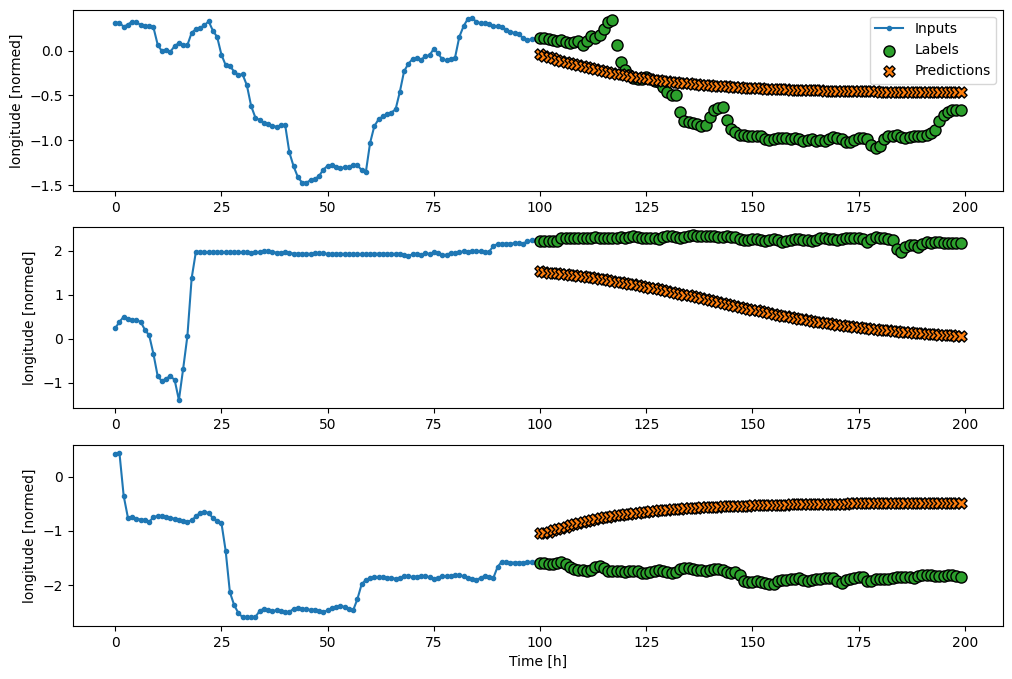

In [6]:
tf_tut_window.plot(autoregressive_model, plot_col='longitude')

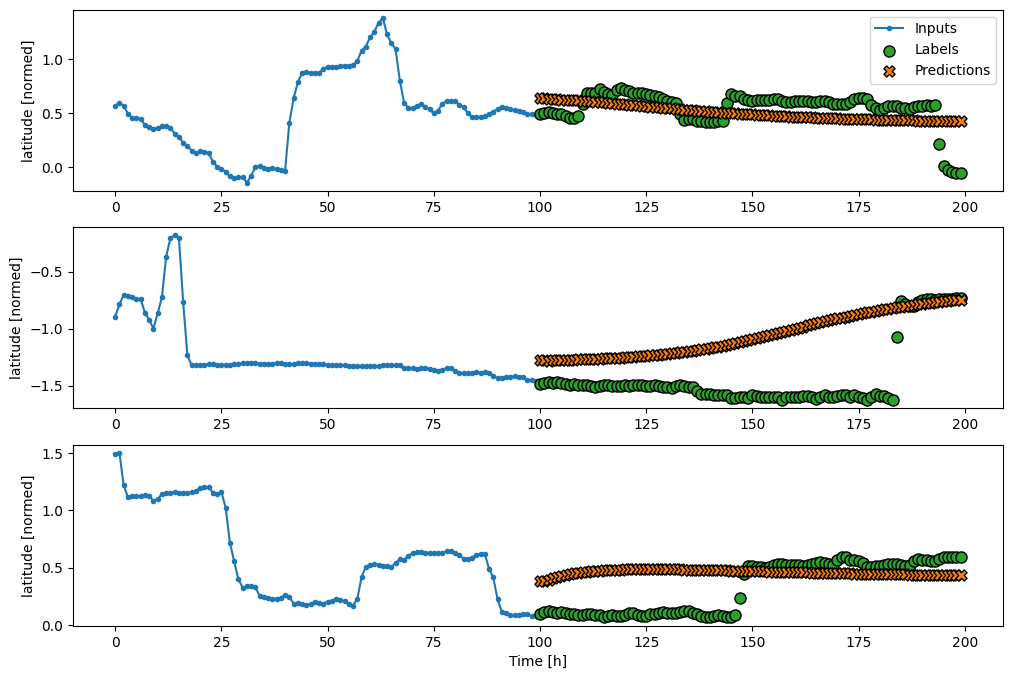

In [7]:
tf_tut_window.plot(autoregressive_model, plot_col='latitude')

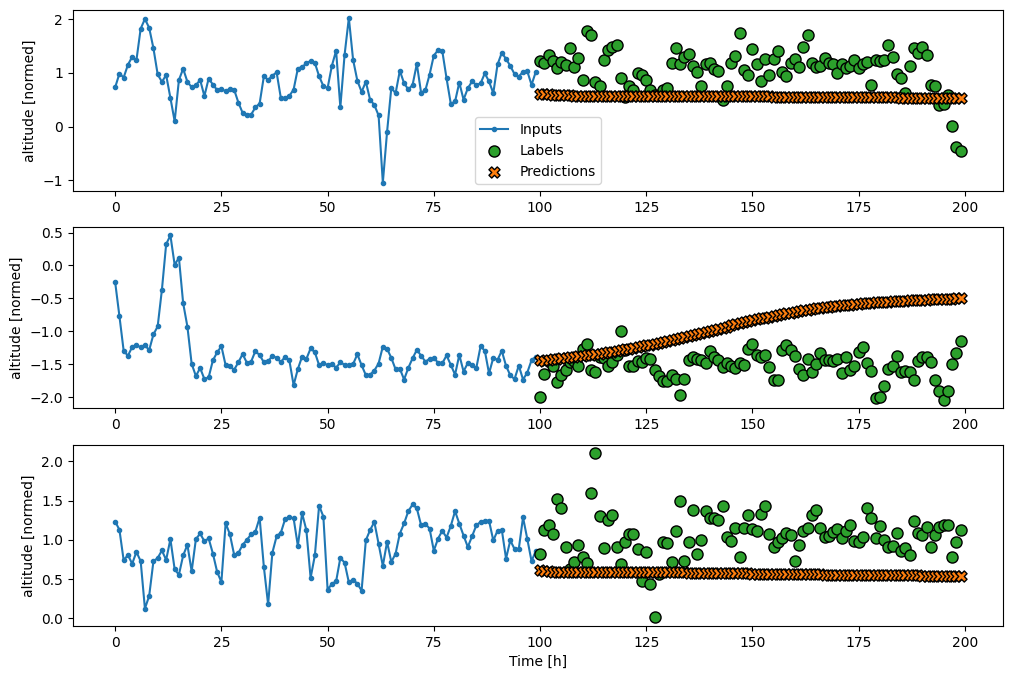

In [8]:
tf_tut_window.plot(autoregressive_model, plot_col='altitude')

In [9]:
results['Autoregressive'] = autoregressive_model.evaluate(tf_tut_window.test, verbose=1, return_dict=True)

18/18 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step - loss: 0.9268 - mean_absolute_error: 0.6951 - mean_squared_error: 0.9268


In [10]:
tf_tut_window.extend_to_csv(url_dest=f'{species}/{file_name}_autoregressive', species=species, model=autoregressive_model)
autoregressive_model.save(f'ModelCreation/SavedModels/{file_name}_autoregressive.keras')

## Single Shot Model

In [11]:
CONV_WIDTH = 3
multi_conv_model = tf.keras.Sequential([
    # Shape [batch, time, features] => [batch, CONV_WIDTH, features]
    tf.keras.layers.Lambda(lambda x: x[:, -CONV_WIDTH:, :]),
    # Shape => [batch, 1, conv_units]
    tf.keras.layers.Conv1D(256, activation='relu', kernel_size=(CONV_WIDTH)),
    # Shape => [batch, 1,  out_steps*features]
    tf.keras.layers.Dense(aux.OUT_STEPS*len(tf_tut_window.column_indices),
                          kernel_initializer=tf.initializers.zeros()),
    # Shape => [batch, out_steps, features]
    tf.keras.layers.Reshape([aux.OUT_STEPS, len(tf_tut_window.column_indices)])
    ])

history = aux.compile_and_fit(multi_conv_model, tf_tut_window)

Epoch 1/20

164/164 ━━━━━━━━━━━━━━━━━━━━ 4s 7ms/step - loss: 0.6540 - mean_absolute_error: 0.6115 - mean_squared_error: 0.6540 - val_loss: 0.4911 - val_mean_absolute_error: 0.4900 - val_mean_squared_error: 0.4911
Epoch 2/20
164/164 ━━━━━━━━━━━━━━━━━━━━ 1s 8ms/step - loss: 0.4641 - mean_absolute_error: 0.4804 - mean_squared_error: 0.4641 - val_loss: 0.4877 - val_mean_absolute_error: 0.4872 - val_mean_squared_error: 0.4877
Epoch 3/20
164/164 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - loss: 0.4598 - mean_absolute_error: 0.4778 - mean_squared_error: 0.4598 - val_loss: 0.4937 - val_mean_absolute_error: 0.4950 - val_mean_squared_error: 0.4937
Epoch 4/20
164/164 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - loss: 0.4530 - mean_absolute_error: 0.4777 - mean_squared_error: 0.4530 - val_loss: 0.4924 - val_mean_absolute_error: 0.4878 - val_mean_squared_error: 0.4924


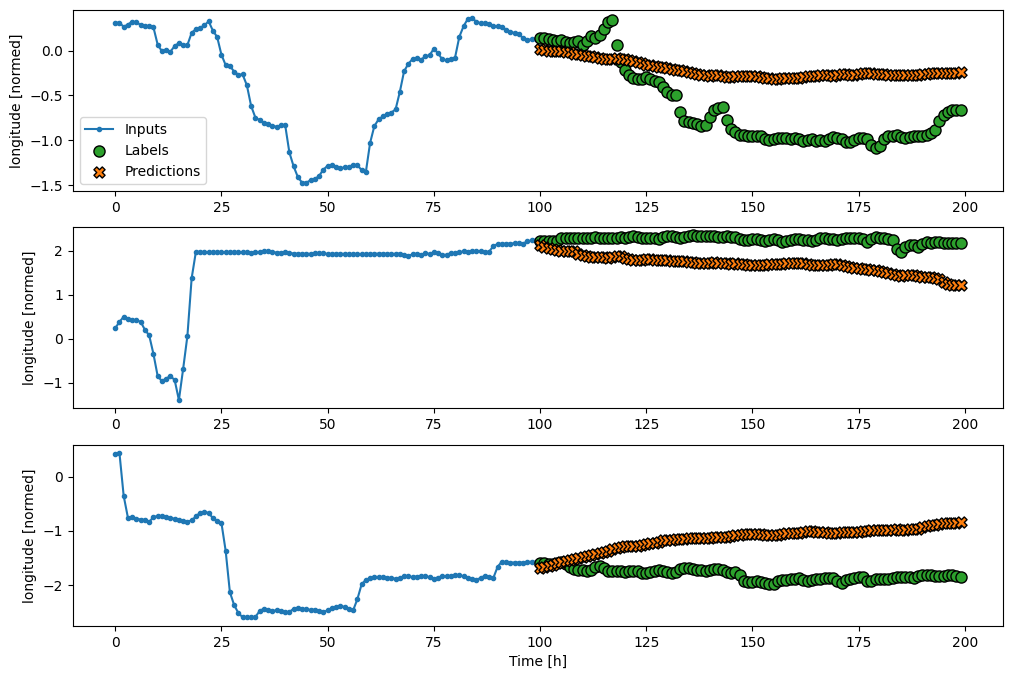

In [12]:
tf_tut_window.plot(multi_conv_model, plot_col='longitude')

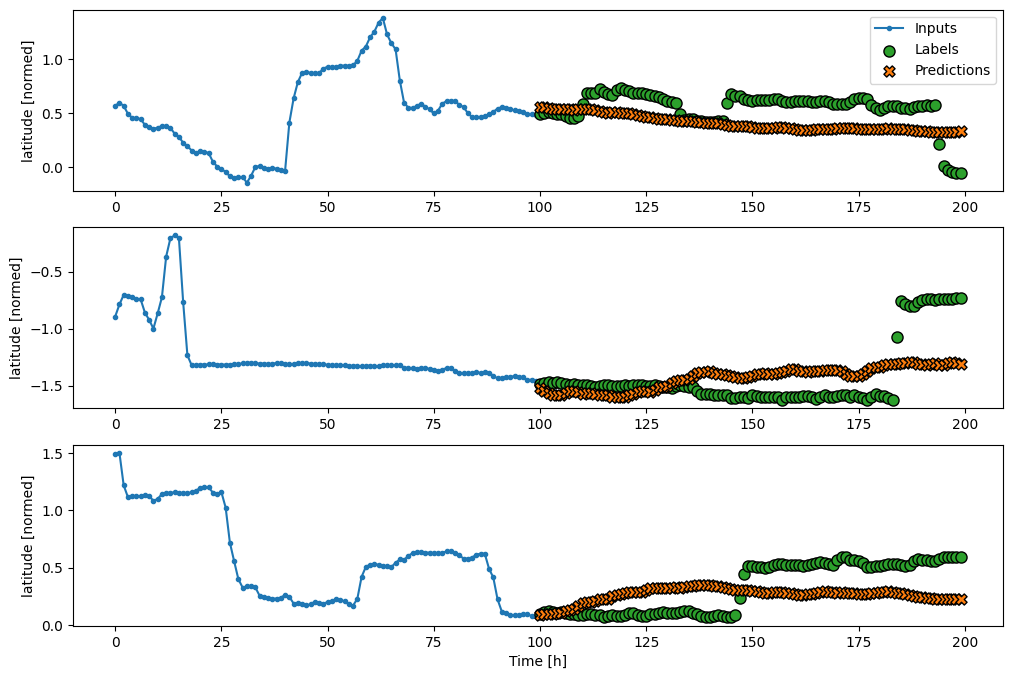

In [13]:
tf_tut_window.plot(multi_conv_model, plot_col='latitude')

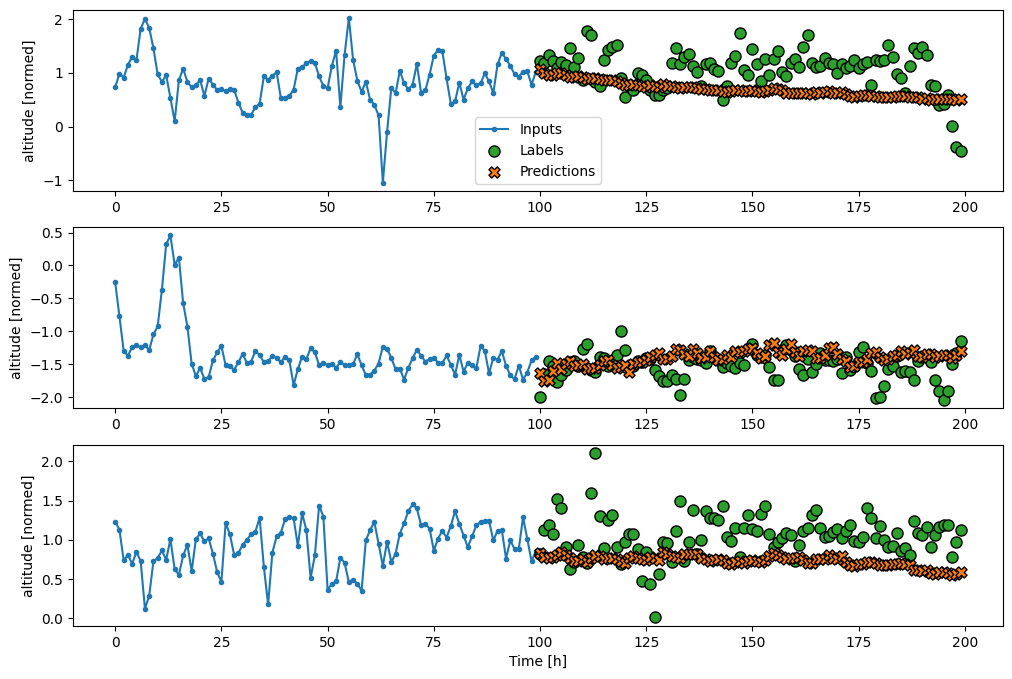

In [14]:
tf_tut_window.plot(multi_conv_model, plot_col='altitude')

In [15]:
results['Single Shot'] = multi_conv_model.evaluate(tf_tut_window.test, verbose=1, return_dict=True)

18/18 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.7840 - mean_absolute_error: 0.6356 - mean_squared_error: 0.7840 


In [16]:
tf_tut_window.extend_to_csv(url_dest=f'{species}/{file_name}_singleshot', species=species, model=multi_conv_model)
multi_conv_model.save(f'ModelCreation/SavedModels/{file_name}_singleshot.keras')

## Regressive Model

In [17]:
regressive_model = tf.keras.models.Sequential([
    tf.keras.layers.Dense(256, input_shape=(1,3), activation='relu'),
    tf.keras.layers.Dense(128, activation='relu'),
    tf.keras.layers.Dense(128, activation='relu'),
    tf.keras.layers.Dense(units=3)
])

reg_window.model_compilation_and_fitting(regressive_model)

Epoch 1/20


c:\Users\Imper\AppData\Local\Programs\Python\Python312\Lib\site-packages\keras\src\layers\core\dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


170/170 ━━━━━━━━━━━━━━━━━━━━ 3s 6ms/step - loss: 0.7972 - mean_absolute_error: 0.7145 - mean_squared_error: 0.7972 - val_loss: 0.6552 - val_mean_absolute_error: 0.6445 - val_mean_squared_error: 0.6552
Epoch 2/20
170/170 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - loss: 0.6242 - mean_absolute_error: 0.6303 - mean_squared_error: 0.6242 - val_loss: 0.6076 - val_mean_absolute_error: 0.6166 - val_mean_squared_error: 0.6076
Epoch 3/20
170/170 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - loss: 0.5985 - mean_absolute_error: 0.6108 - mean_squared_error: 0.5985 - val_loss: 0.5582 - val_mean_absolute_error: 0.5853 - val_mean_squared_error: 0.5582
Epoch 4/20
170/170 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - loss: 0.5635 - mean_absolute_error: 0.5868 - mean_squared_error: 0.5635 - val_loss: 0.5503 - val_mean_absolute_error: 0.5786 - val_mean_squared_error: 0.5503
Epoch 5/20
170/170 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - loss: 0.5381 - mean_absolute_error: 0.5738 - mean_squared_error: 0.5381 - val_loss: 0.5261 - val_mean_absolut

In [18]:
regressive_model(reg_window.train_input)*reg_window.train_df[['longitude', 'latitude', 'altitude']].std() + reg_window.train_df[['longitude', 'latitude', 'altitude']].mean()

<tf.Tensor: shape=(6970, 1, 3), dtype=float32, numpy=
array([[[-111.402336,   57.367523,  300.492   ]],

       [[-111.35617 ,   57.3302  ,  264.53275 ]],

       [[-111.425606,   57.405205,  304.4267  ]],

       ...,

       [[-111.36726 ,   57.33043 ,  270.35315 ]],

       [[-111.40954 ,   57.420155,  301.73267 ]],

       [[-111.40887 ,   57.36197 ,  290.91336 ]]], dtype=float32)>

In [19]:
results['Regressive Model'] = regressive_model.evaluate(reg_window.test_input, reg_window.test_label, verbose=1, return_dict=True)

25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.4298 - mean_absolute_error: 0.5004 - mean_squared_error: 0.4298 


In [20]:
reg_window.csv_extension(f'{species}/{file_name}', regressive_model)

In [21]:
multi_conv_model.save(f'ModelCreation/SavedModels/{file_name}_regressive.keras')

## Classification Model

In [ ]:
classification_model = tf.keras.models.Sequential([
    tf.keras.layers.Dense(256, input_shape=(1, 3), activation='relu'),
    tf.keras.layers.Dense(128, activation='relu'),
    tf.keras.layers.Dense(128, activation='relu'),
    tf.keras.layers.Dense(3, activation='softmax'),
])

classification_window.model_compilation_and_fitting(classification_model)

In [ ]:
classification_model(classification_window.test_input)

In [ ]:
results['Classification Model'] = classification_model.evaluate(classification_window.test_input, classification_window.test_label, verbose=1, return_dict=True)

In [ ]:
classification_window.csv_extension(f'{species}/{file_name}', classification_model)

In [ ]:
classification_model.save(f'ModelCreation/SavedModels/{file_name}_classification.keras')

## Final Results

In [22]:
results_df = pd.DataFrame(results).T

results_df
# results_df.to_csv(f'ModelCreation/{file_name}_test_data.csv', index_label='Model_Name')

,loss,mean_absolute_error,mean_squared_error
Autoregressive,0.905752,0.687536,0.905752
Single Shot,0.770838,0.631636,0.770838
Regressive Model,0.485034,0.536146,0.485034
